## Background oMn concentration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd


%matplotlib inline

Observations:

In [2]:
# Concentration of dMn in 2015
Manuel = pd.read_csv('/ocean/brogalla/GEOTRACES/data/DMn_nmolL-1_BR-edited.csv')
Manuel_station_names = Manuel['Station'].astype('string')
Manuel_depths        = Manuel['Depth'].astype('float')
Manuel_dMn_nmolkg    = Manuel['nmol kg-1'].astype('float').values
Manuel_dMn_nmolL     = Manuel['nmol L-1'].astype('float').values
Manuel_salinity      = Manuel['Salinity'].astype('float').values

depth_CB2 = Manuel_depths[Manuel_station_names=='CB2'].values
depth_CB3 = Manuel_depths[Manuel_station_names=='CB3'].values
depth_CB4 = Manuel_depths[Manuel_station_names=='CB4'].values

In [3]:
# units: pmol / L
pMn_CB3 = np.array([[9.89505,674.0952684], [24.7367,853.3066816], [57.3846,233.4047255], [178.037,4841.507948],
                    [197.81,5127.15382], [474.423,957.305716], [790.098,840.4666579], [1380.7,363.7459108],
                    [1969.64,444.9417019], [2459.18,378.2499246], [3434.95,379.0022695]])

pMn_CB4 = np.array([[10,104.4], [25,272.8], [71,76.1], [150,1636.9], [220,2550.3], [500,1153.7], [800,1012.7],
                    [1401,679.6], [2000,483.0], [2500,537.2], [3499,1488.5]])

pMn_CB2 = np.array([[10,317.1], [25,285.1], [59,144.2], [65,454.4], [140,2868.9], [200,1851.9], [400,982.2],
                    [800,878.8], [1200,1052.5]])

Model:

In [25]:
month = 8
CB2_coord = (507, 383)
CB3_coord = (546, 456)
CB4_coord = (628, 470)

ref0   = nc.Dataset('/data/brogalla/run_storage/Mn-reference-202110/ANHA12_ref-2015_20211012/ANHA12_EXH006_2015_monthly.nc')
omn    = np.array(ref0.variables['oxidismn'])[month,0,:,:,:]
deptht = np.array(ref0.variables['deptht'])

Profiles:

In [26]:
def plot_oMn(omn):
    
    fig, ax = plt.subplots(1,3, figsize=(12,8))

    for axis in ax:
        axis.invert_yaxis()
        axis.set_xlim([0,5e-9])
        axis.set_ylim([3000,0])

    # Model:
    fig.suptitle(f'Particulate Mn')
    ax[0].set_title('CB2')
    ax[0].plot(omn[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='2015')
    ax[1].set_title('CB3')
    ax[1].plot(omn[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='2015')
    ax[2].set_title('CB4')
    ax[2].plot(omn[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='2015')

    # Observations:
    ax[0].plot(pMn_CB2[:,1]*1e-12, pMn_CB2[:,0], '--k', label='observed')
    ax[1].plot(pMn_CB3[:,1]*1e-12, pMn_CB3[:,0], '--k', label='observed')
    ax[2].plot(pMn_CB4[:,1]*1e-12, pMn_CB4[:,0], '--k', label='observed')

    ax[0].set_ylabel('Depth [m]', fontsize=12)
    ax[0].legend(fontsize=12)
    
    return

# Plot

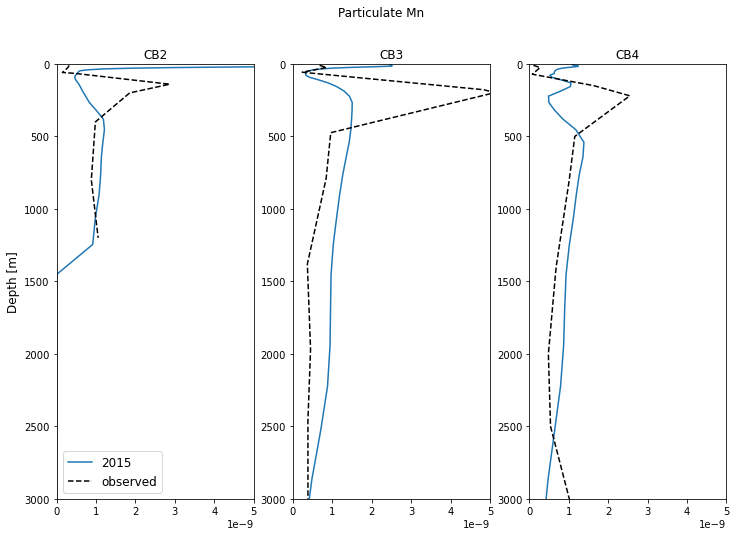

In [23]:
plot_oMn(omn)